# Taxi Vis - Data visualization project 
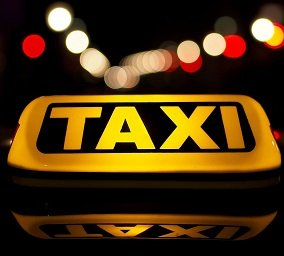

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Taxi_data.csv')

In [3]:
df.head(3)

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,pickup_day_number,dropoff_day_number,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance,Profit
0,2,2016-01-11 12:05:45,2016-01-11 12:12:34,1,-73.989449,40.741734,-73.996880,40.725307,N,409,...,0,0,12,12,1,1,Afternoon,Afternoon,1.930838,8.324456
1,1,2016-01-14 12:04:38,2016-01-14 12:21:14,1,-73.993034,40.747849,-73.979271,40.749985,N,996,...,3,3,12,12,1,1,Afternoon,Afternoon,1.183499,5.036161
2,1,2016-01-09 20:03:09,2016-01-09 20:10:45,1,-74.005157,40.720306,-73.994019,40.736187,N,456,...,5,5,20,20,1,1,Evening,Evening,1.999803,8.627900


In [4]:
df.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'pickup_day_name', 'dropoff_day_name', 'pickup_day_number',
       'dropoff_day_number', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'pickup_timeofday', 'dropoff_timeofday', 'distance',
       'Profit'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56278 entries, 0 to 56277
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   vendor_id           56278 non-null  int64  
 1   pickup_datetime     56278 non-null  object 
 2   dropoff_datetime    56278 non-null  object 
 3   passenger_count     56278 non-null  int64  
 4   pickup_longitude    56278 non-null  float64
 5   pickup_latitude     56278 non-null  float64
 6   dropoff_longitude   56278 non-null  float64
 7   dropoff_latitude    56278 non-null  float64
 8   store_and_fwd_flag  56278 non-null  object 
 9   trip_duration       56278 non-null  int64  
 10  pickup_day_name     56278 non-null  object 
 11  dropoff_day_name    56278 non-null  object 
 12  pickup_day_number   56278 non-null  int64  
 13  dropoff_day_number  56278 non-null  int64  
 14  pickup_hour         56278 non-null  int64  
 15  dropoff_hour        56278 non-null  int64  
 16  pick

In [6]:
df.isnull().sum() # no missing value

vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
pickup_day_name       0
dropoff_day_name      0
pickup_day_number     0
dropoff_day_number    0
pickup_hour           0
dropoff_hour          0
pickup_month          0
dropoff_month         0
pickup_timeofday      0
dropoff_timeofday     0
distance              0
Profit                0
dtype: int64

#### Check the duplicates data and drop them

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
56273     True
56274    False
56275     True
56276    False
56277     True
Length: 56278, dtype: bool

In [8]:
df.duplicated().sum()

16049

In [9]:
df.shape

(56278, 22)

In [10]:
df.drop_duplicates(inplace = True , ignore_index = True)

In [11]:
df.shape

(40229, 22)

In [35]:
sns.set_theme(context = 'paper' , style = 'whitegrid' , palette = 'summer' , font_scale = 1.2,)

### Q1: using 2 different kinds of plots, Inspect the distribution of the distance less than 25 km. 

In [19]:
dis_25 = df[ df['distance'] < 25]
dis_25.shape

(40229, 22)

<Figure size 720x360 with 0 Axes>

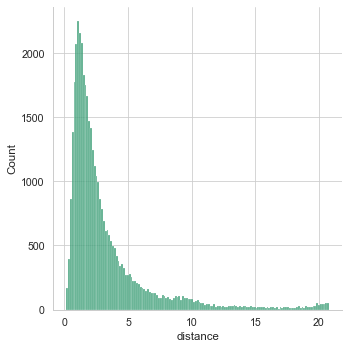

In [22]:
plt.figure(figsize = [10,5])
sns.displot(data = dis_25 , x = 'distance') # skew to the right

<AxesSubplot:xlabel='distance', ylabel='Density'>

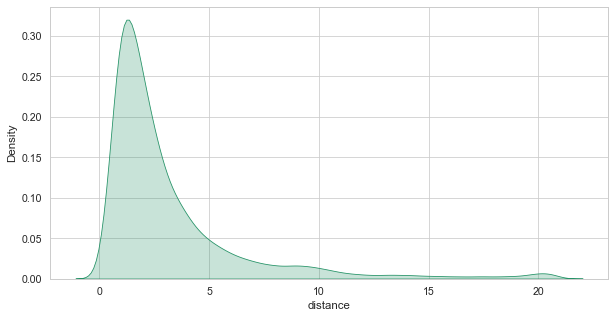

In [23]:
plt.figure(figsize = [10,5])
sns.kdeplot(data = dis_25 , x = 'distance' , shade = True)

###  Q2: using bar chart, inspect which time of the day corsponds to the highest Profit.


In [24]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,pickup_day_number,dropoff_day_number,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance,Profit
0,2,2016-01-11 12:05:45,2016-01-11 12:12:34,1,-73.989449,40.741734,-73.996880,40.725307,N,409,...,0,0,12,12,1,1,Afternoon,Afternoon,1.930838,8.324456
1,1,2016-01-14 12:04:38,2016-01-14 12:21:14,1,-73.993034,40.747849,-73.979271,40.749985,N,996,...,3,3,12,12,1,1,Afternoon,Afternoon,1.183499,5.036161
2,1,2016-01-09 20:03:09,2016-01-09 20:10:45,1,-74.005157,40.720306,-73.994019,40.736187,N,456,...,5,5,20,20,1,1,Evening,Evening,1.999803,8.627900
3,1,2016-01-17 00:29:19,2016-01-17 00:31:09,2,-73.985374,40.753082,-73.979370,40.760429,N,110,...,6,6,0,0,1,1,Late night,Late night,0.960832,4.056429
4,2,2016-01-24 23:53:10,2016-01-25 00:13:46,1,-74.014000,40.712551,-73.972519,40.797508,N,1236,...,6,0,23,0,1,1,Late night,Late night,10.072253,44.146681


In [25]:
dt = df.groupby('pickup_timeofday')['Profit'].sum().to_frame().reset_index().sort_values(by = 'Profit' , ascending = False)
dt

,pickup_timeofday,Profit
1,Evening,184586.134942
2,Late night,144965.482727
3,Morning,125363.290533
0,Afternoon,105975.230615


<AxesSubplot:xlabel='pickup_timeofday', ylabel='Profit'>

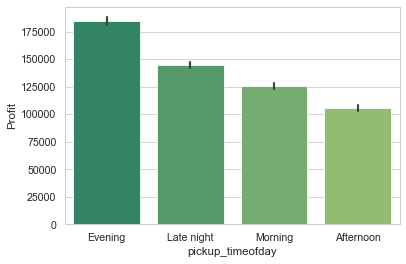

In [26]:
sns.barplot(data = df , x = 'pickup_timeofday' , y = 'Profit' , estimator = np.sum , order = dt['pickup_timeofday'])

### Q3: which hours crosponds for higher profits.


In [27]:
df.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'pickup_day_name', 'dropoff_day_name', 'pickup_day_number',
       'dropoff_day_number', 'pickup_hour', 'dropoff_hour', 'pickup_month',
       'dropoff_month', 'pickup_timeofday', 'dropoff_timeofday', 'distance',
       'Profit'],
      dtype='object')

In [28]:
dt = df.groupby('pickup_hour')['Profit'].sum().to_frame().sort_values(ascending = False , by = 'Profit')
dt

,Profit
pickup_hour,
21,33875.068431
20,32965.501833
22,32680.294724
18,32537.992856
19,31408.494537
23,29226.043706
15,28903.562729
17,28267.057302
14,27421.313937


<AxesSubplot:xlabel='pickup_hour', ylabel='Profit'>

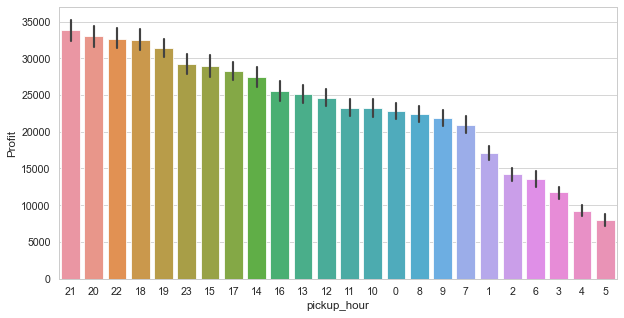

In [30]:
plt.figure(figsize = [10,5])
sns.barplot(data = df ,x = 'pickup_hour' , y = 'Profit' , estimator = np.sum , order = dt.index)

### Q4: Find the vendor ratio 

In [31]:
ven_ratio = df['vendor_id'].value_counts(normalize = True).to_frame().reset_index() * 100
ven_ratio.rename(columns = {'index' : 'vendor_id' , 'vendor_id' : 'ratio'} , inplace = True)
ven_ratio

,vendor_id,ratio
0,200,53.754754
1,100,46.245246


<AxesSubplot:xlabel='vendor_id', ylabel='ratio'>

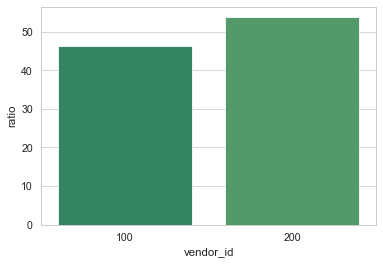

In [36]:
sns.barplot(data = ven_ratio , x = 'vendor_id' , y = 'ratio')

### Q5: which weekday crosponds for higher trips.

In [37]:
days = df['pickup_day_name'].value_counts().to_frame()
days

,pickup_day_name
Friday,7223
Saturday,6154
Sunday,5724
Thursday,5576
Wednesday,5476
Tuesday,5237
Monday,4839


<AxesSubplot:xlabel='pickup_day_name', ylabel='count'>

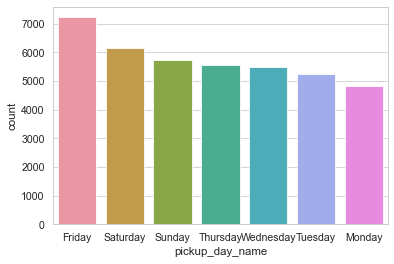

In [38]:
sns.countplot(data = df , x = 'pickup_day_name' , order = days.index)

### Q6: Inspect how many trips per each count of passengers in one ride


In [39]:
passengers = df['passenger_count'].value_counts().to_frame()
passengers

,passenger_count
1,28637
2,5598
5,2311
3,1577
6,1369
4,737


<AxesSubplot:xlabel='passenger_count', ylabel='count'>

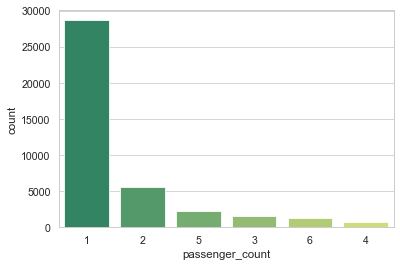

In [40]:
sns.countplot(data = df , x = 'passenger_count' , order = passengers.index)

### Q7: is there any corrleation between distance of the trip and profit


In [41]:
df['distance'].corr(df['Profit'])

0.9999999999999997

In [42]:
df[['Profit' , 'distance']].corr()

,Profit,distance
Profit,1.0,1.0
distance,1.0,1.0


<AxesSubplot:>

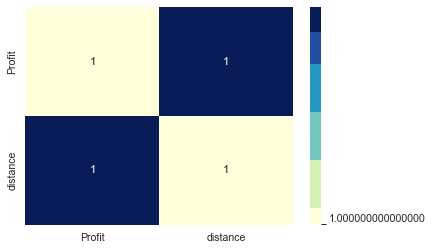

In [44]:
sns.heatmap(df[['Profit' , 'distance']].corr() , annot = True ,cmap="YlGnBu" )

<AxesSubplot:xlabel='distance', ylabel='Profit'>

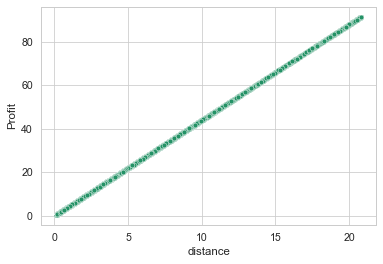

In [45]:
sns.scatterplot(data = df , x = 'distance' , y = 'Profit')

### Q8: is there any outliers in trip duration


<AxesSubplot:xlabel='trip_duration'>

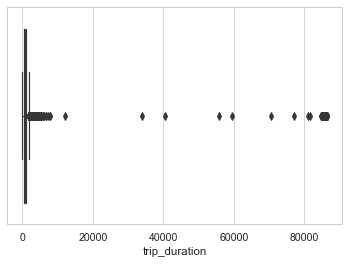

In [46]:
sns.boxplot(data = df , x = 'trip_duration')

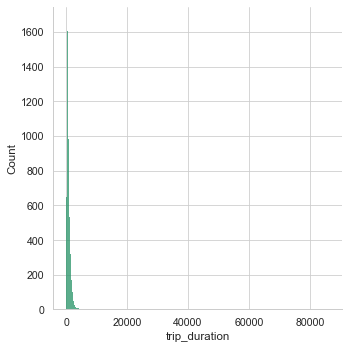

In [47]:
sns.displot(data = df , x = 'trip_duration') # skewed to the right 

<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

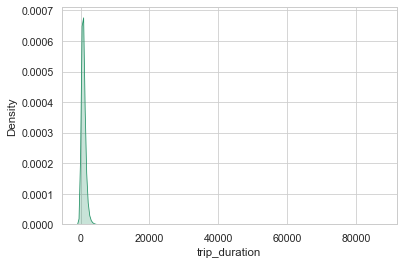

In [48]:
sns.kdeplot(data = df , x = 'trip_duration' , shade = True)

In [49]:
des = df['trip_duration'].describe()
des

count    40229.000000
mean       871.166845
std       2856.631854
min          9.000000
25%        383.000000
50%        626.000000
75%       1002.000000
max      86341.000000
Name: trip_duration, dtype: float64

In [50]:
IQR = des['75%'] - des['25%']
max_whisker = des['75%'] + 1.5 * IQR
min_whisker = des['25%'] - 1.5 * IQR

In [51]:
outlier = df [ (df['trip_duration'] > max_whisker) | (df['trip_duration'] < min_whisker)]

In [52]:
outlier

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,pickup_day_number,dropoff_day_number,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance,Profit
11,1,2016-01-25 10:16:44,2016-01-25 11:07:39,2,-73.984917,40.763615,-74.072746,40.664791,Y,3055,...,0,0,10,11,1,1,Morning,Morning,13.249480,58.126479
32,1,2016-01-01 15:22:46,2016-01-01 16:03:50,1,-73.988945,40.748455,-73.934357,40.679531,N,2464,...,4,4,15,16,1,1,Afternoon,Evening,8.938959,39.160186
50,2,2016-01-14 15:02:20,2016-01-14 15:36:03,1,-73.988892,40.757778,-73.873077,40.774349,N,2023,...,3,3,15,15,1,1,Afternoon,Afternoon,9.926068,43.503465
55,2,2016-01-04 06:24:45,2016-01-04 07:17:35,5,-73.790047,40.646969,-73.977699,40.725529,N,3170,...,0,0,6,7,1,1,Morning,Morning,18.073758,79.353302
67,1,2016-01-25 21:55:01,2016-01-25 22:29:00,1,-73.997231,40.722355,-73.865509,40.690887,N,2039,...,0,0,21,22,1,1,Evening,Late night,11.641414,51.050990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40134,2,2016-01-01 04:56:51,2016-01-01 05:37:35,1,-73.987366,40.760021,-73.903343,40.677902,N,2444,...,4,4,4,5,1,1,Late night,Late night,11.555171,50.671519
40143,1,2016-01-26 18:37:51,2016-01-26 19:11:13,2,-73.874519,40.774063,-73.978455,40.777351,N,2002,...,1,1,18,19,1,1,Evening,Evening,8.759494,38.370539
40157,2,2016-01-08 06:37:25,2016-01-08 07:44:24,1,-73.780663,40.646343,-73.982475,40.727467,N,4019,...,4,4,6,7,1,1,Morning,Morning,19.259405,84.570149
40169,2,2016-01-02 14:46:09,2016-01-02 15:25:12,1,-74.015984,40.704762,-73.959579,40.577389,N,2343,...,5,5,14,15,1,1,Afternoon,Afternoon,14.941420,65.571015


### Q9: Create a boxplot reflecting each time zone with distance features and comment your interpretation.


<AxesSubplot:xlabel='pickup_timeofday', ylabel='distance'>

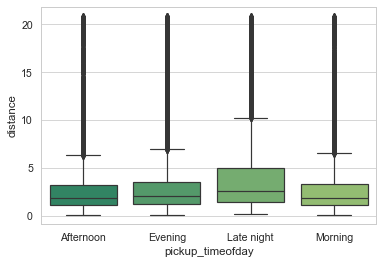

In [53]:
sns.boxplot(data = df , x = 'pickup_timeofday' , y = 'distance')

### Q10: find the average profit of each timezone each day with heatmap

In [54]:
df[['pickup_timeofday','Profit','pickup_day_name']].head()

,pickup_timeofday,Profit,pickup_day_name
0,Afternoon,8.324456,Monday
1,Afternoon,5.036161,Thursday
2,Evening,8.627900,Saturday
3,Late night,4.056429,Sunday
4,Late night,44.146681,Sunday


In [55]:
group = df.groupby(['pickup_timeofday' , 'pickup_day_name'])['Profit'].sum().to_frame().unstack()
group

Profit                                            \
pickup_day_name         Friday        Monday      Saturday        Sunday   
pickup_timeofday                                                           
Afternoon         19660.072205  13731.145084  14229.768353  17434.410440   
Evening           32085.029263  23514.587127  23581.342542  26323.545417   
Late night        29226.601125  13237.953487  29859.050775  27930.984589   
Morning           22222.991982  18236.376039  14277.938554  13613.973389   

                                                            
pickup_day_name       Thursday       Tuesday     Wednesday  
pickup_timeofday                                            
Afternoon         14624.882198  12701.354434  13593.597902  
Evening           26315.693670  26788.501289  25977.435633  
Late night        17369.968128  13599.986530  13740.938093  
Morning           18071.569276  19120.361601  19820.079693

In [56]:
pivt = df.pivot_table(columns = 'pickup_day_name' , index = 'pickup_timeofday' , values = 'Profit' , aggfunc = np.sum)
pivt

pickup_day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
pickup_timeofday,,,,,,,
Afternoon,19660.072205,13731.145084,14229.768353,17434.410440,14624.882198,12701.354434,13593.597902
Evening,32085.029263,23514.587127,23581.342542,26323.545417,26315.693670,26788.501289,25977.435633
Late night,29226.601125,13237.953487,29859.050775,27930.984589,17369.968128,13599.986530,13740.938093
Morning,22222.991982,18236.376039,14277.938554,13613.973389,18071.569276,19120.361601,19820.079693


<AxesSubplot:xlabel='pickup_day_name', ylabel='pickup_timeofday'>

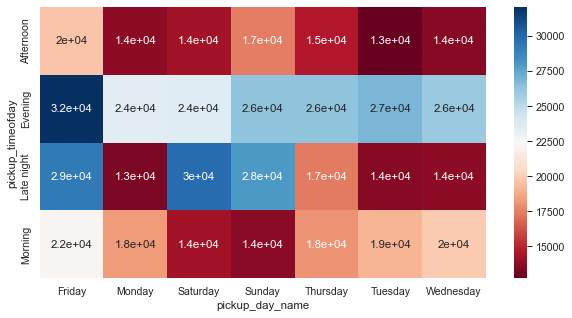

In [61]:
plt.figure(figsize = [10 , 5])
sns.heatmap(pivt , annot = True , cmap="RdBu")

<AxesSubplot:xlabel='None-pickup_day_name', ylabel='pickup_timeofday'>

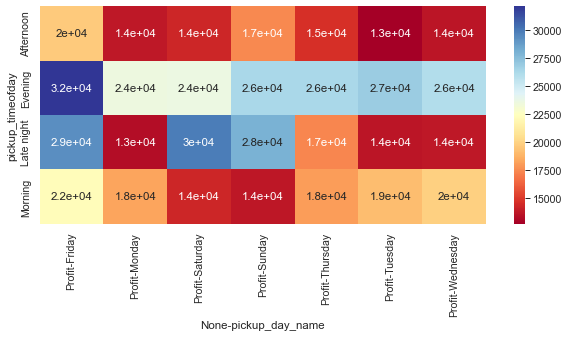

In [65]:
plt.figure(figsize = [10 , 4])
sns.heatmap(group , annot = True , cmap = 'RdYlBu')

<AxesSubplot:xlabel='pickup_day_name', ylabel='Profit'>

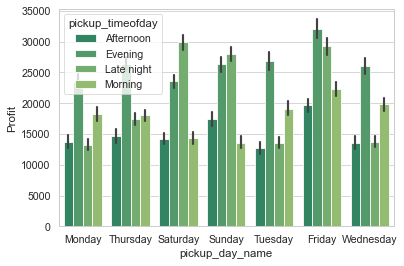

In [66]:
sns.barplot(data = df , x = 'pickup_day_name' , y = 'Profit' , hue = 'pickup_timeofday' , estimator = np.sum)

#### what is the best passenger count for profit ?

In [67]:
passenger = df.groupby('passenger_count')['Profit'].sum().sort_values().to_frame().reset_index()
passenger

,passenger_count,Profit
0,4,10498.648017
1,6,18754.898930
2,3,21849.939786
3,5,32624.185564
4,2,82751.521899
5,1,394410.944621


<AxesSubplot:xlabel='passenger_count', ylabel='Profit'>

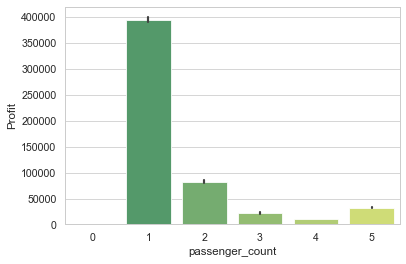

In [68]:
sns.barplot(data = df , x = 'passenger_count' , y = 'Profit' , order = passenger.index , estimator = np.sum)

# <center> Thanks 🥳